# **TIME SERIES FORECASTING - AUTOREGRESSIVE MODEL (AR)**

Name: **AUTO REGRESSIVE MODEL (AR)**  
Date : 2022  
Author: Aurélien Vannieuwenhuyze  


<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under the terms of the <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.</a>.
<hr/>

In [2]:
import pandas as pnd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import  plot_pacf, plot_acf
from statsmodels.tsa.stattools import pacf
import numpy as np
import pandas as pnd
from statsmodels.tsa.ar_model import AutoReg
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
from scipy import stats
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.tsa.ar_model import AutoReg

## **1: AUTO REGRESSIVE MODEL (AR)**

$$y_t = c + \beta_1*y_{t-1} + \beta_2*y_{t-2} + ... +\beta_n*y_{t-n} + \epsilon_t$$

$$c \text{ is a constant} $$

This means that $y_t$ is predict with previous $y_t$ values

> **The time series must be stationary**

###1.1: Generation of a time series

$\epsilon_t$ (residuals) is a white noise

In [3]:
#Generation of residuals
mean = 0
standardDeviation = 1
errors = np.random.normal(loc=mean,scale=standardDeviation, size=100)


We will now generate y data (It's just to get some baseline data).
These data are generated from a white noise, to have no correlation between them

In [ ]:
#Generation of y
y = np.random.normal(loc=mean,scale=standardDeviation, size=100)

In [4]:
y = [ 0.53171375, -1.13004684,  1.79906943,  5.28364035,  4.70368022,  6.41399362,
  7.23316384,  7.86039149,  6.4177638,   6.87120017,  8.34900317,  8.5213409,
  7.5862709,   5.94740528,  4.36290473,  5.22980318,  5.76484894,  6.50820903,
  5.6178172,   7.19961042,  7.21770871,  6.32855245,  5.65257571,  6.70215031,
  6.36544104,  7.15820186,  6.31186086,  6.51551651,  6.46468354,  6.55810009,
  6.42732869,  6.18624249,  6.76566375,  7.40482989,  9.00639677,  8.28786648,
  7.40592888,  6.65316765,  4.57680106,  6.02095438,  5.65845565,  6.64868243,
  6.96780693,  8.04842723,  7.89512635,  8.08302121,  6.40298035,  6.12838728,
  6.37525084,  7.85088718,  8.37155213,  7.43692165,  7.261006,  5.70100846,
  4.93344287,  5.93898008,  6.49964012,  5.05475137,  7.07325126,  6.00013402,
  8.39459373,  8.44255308,  6.79384811,  6.41294045,  5.03272732,  6.30485573,
  6.85840508,  8.07423934,  7.2503207,   7.93862196,  9.9423554,  10.2006523,
  8.81992323,  6.87449427,  7.72184,     7.02950636,  6.42642659,  5.3100392,
  4.5303716,   5.71741515,  5.79667926,  6.69253657,  6.08910187,  7.08488078,
  6.37976055,  6.50373773,  6.63543971,  5.23812489,  7.35495452,  7.03443667,
  6.62948259,  8.77340981,  7.43658585,  7.1843629,  8.61524929,  8.94050175,
  7.68484821,  8.60103042,  6.24779747,  7.11666841]

y = np.array(y)

[]

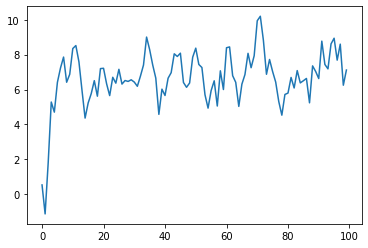

In [ ]:
plt.plot(y)
plt.plot()

We now introduce the autocorrelation

$$y_t = 2+0.7y_{t-1}+\epsilon_t$$

In [5]:
#Compute the y_t values
for t in range(2,len(y)):
  y[t] =  2+0.7*y[t-1] + errors[t]

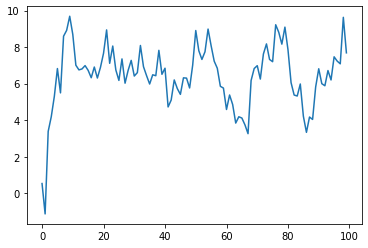

In [6]:
plt.plot(y)
plt.show()


###1.2: Find the significant lag of partial autocorrelation with PACF 

The autoregression model consists in predicting the $y_t$ value from the $y_{t-k}$ values.
We must therefore find which lag $k$ of the time series shows a significant autocorrelation.

> We cannot use lag 0. Indeed, the autocorrelation is 100%, but we do not have any previous data allowing us to implement the autoregression model.

So we have to find the lag of significant autocorrelation but we have to make sure that this autocorrelation is not disturbed by the previous lags.

**This is why we will use the PACF**

First, we must ensure that the time series is stationary

In [7]:
ADF = adfuller(y, autolag='AIC')
if ADF[1] < 0.05:
  print('Stationary')
else:
  print("No stationary")

Stationary


[]

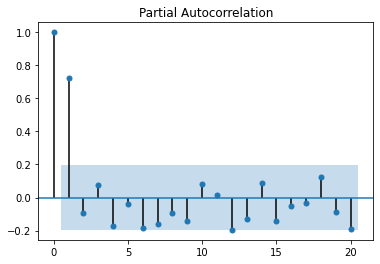

In [8]:
plot_pacf(y)
plt.plot()

In [ ]:
pacf(y,10)

array([ 1.        ,  0.79630128,  0.08278333, -0.13202869,  0.08668338,
        0.12268722, -0.00222799, -0.01527936,  0.05891851, -0.00343161,
        0.09997001])

We can see that the significant PACF lag is **the first one**. (0.66)


This corresponds to the equation we defined earlier.
$$y_t = 2+0.7y_{t-1}+\epsilon_t$$

We would have a lag of 2 in this situation,
$$y_t = c + \beta_1y_{t-1}+\beta_2y_{t-2}+\epsilon_t$$

A lag of 3 in this one
$$y_t = c + \beta_1y_{t-1}+\beta_2y_{t-2}+\beta_3y_{t-3}+\epsilon_t$$

And so on...

###**1.3: AR(p)**

PACF helps us to identify the partial autocorrelation order of a temporal series.
$$p=1 \text{ in our case}$$

Once this order is identified, we can use it in an autoregressive model with this notation
$$AR(p)$$
$$AR(1)$$

> The objective of the autoregression model is to find the different values of the beta coefficients and the constant c.

####1.3.1: SkLearn

In [ ]:
p = 1

In [ ]:
df = pnd.DataFrame()
df["yt"] = y
df["yt-1"] = df["yt"].shift(p)

In [ ]:
df.head()

,yt,yt-1
0,0.531714,NaN
1,-1.130047,0.531714
2,0.552609,-1.130047
3,1.826022,0.552609
4,2.201513,1.826022


In [ ]:
train =  df.iloc[:90]
test =  df.iloc[90:]

In [ ]:
train.head()

,yt,yt-1
0,0.531714,NaN
1,-1.130047,0.531714
2,0.552609,-1.130047
3,1.826022,0.552609
4,2.201513,1.826022


In [ ]:
train = train.drop(0)

In [ ]:
train

,yt,yt-1
1,-1.130047,0.531714
2,0.552609,-1.130047
3,1.826022,0.552609
4,2.201513,1.826022
5,2.554589,2.201513
...,...,...
85,8.712817,8.030299
86,6.912276,8.712817
87,7.818407,6.912276
88,7.487164,7.818407


In [ ]:
model = LinearRegression()
model.fit(np.array(train["yt-1"]).reshape(-1,1),train["yt"])
print("Betas : ",model.coef_)
print("Beta_0 : ",model.intercept_)

Betas :  [0.79837155]
Beta_0 :  1.430886636967041


####1.3.3:Model evaluation

>For more information on this part, please refer to the note book presenting the linear regression and its validation assumptions

In [ ]:
test.head()

,yt,yt-1
90,7.015874,7.984352
91,8.548147,7.015874
92,9.029851,8.548147
93,7.303801,9.029851
94,6.421375,7.303801


In [ ]:
predictions = model.predict(np.array(test["yt-1"]).reshape(-1,1))

In [ ]:
rmse = mean_squared_error(test["yt"], predictions, squared=False)
print(rmse)

1.079763600233426


In [ ]:
#residuals
residuals = pnd.DataFrame()
residuals["y_true"] = test["yt"]
residuals["prediction"] = predictions
residuals["residuals"] = residuals["y_true"] - residuals["prediction"]

residuals.head()

,y_true,prediction,residuals
90,7.015874,7.805366,-0.789492
91,8.548147,7.032161,1.515986
92,9.029851,8.255484,0.774367
93,7.303801,8.640063,-1.336262
94,6.421375,7.262034,-0.840659


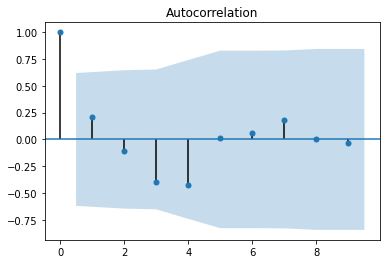

In [ ]:
plot_acf(residuals["residuals"])
plt.show()

To confirm that the linear regression model fits the problem, there must be no pattern or correlation between the residuals.  

With the ACF we can observe that there is no autocorrelation. **It's a white noise**.

Then there is no pattern and correlation in residuals.



In [ ]:
shapiro_test = stats.shapiro(residuals["residuals"])
print("Shapiro p-value ",shapiro_test.pvalue)

if (shapiro_test.pvalue>0.05):
  print("Residuals are normally distributed")
else:
  print("Residuals are NOT normally distributed")

Shapiro p-value  0.837081789970398
Residuals are normally distributed


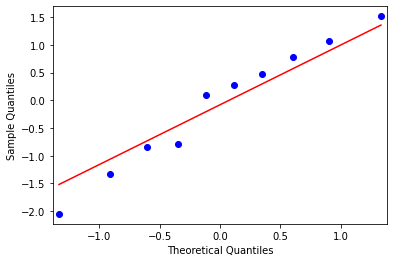

In [ ]:
sm.qqplot(residuals["residuals"], line='s')
plt.show()

In [ ]:
residuals["residuals"].mean()

-0.08117345583669185

The mean of the residuals est near from 0, and they are normally distributed.

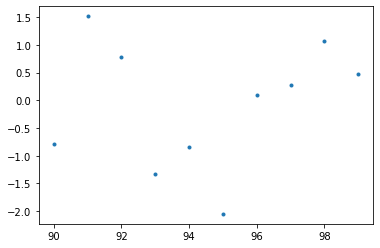

In [ ]:
plt.plot(residuals["residuals"],".")
plt.show()

No "cone" is observed. The residuals are therefore homoscedastic

####1.3.4: Forecasting

To predict the future, we will rely on the data located in Yt.
- Yt has 100 values.
- To predict the 101st we will use the 100th, 99th and 98th value of Yt
- **This 101st new value will then be added to Yt**
- The 102nd value will be predicted using the 101st, the 100th, and the 99th value of Yt
- and so on. 

In [ ]:
significantLag = 1

In [ ]:
Yt = y
predictions = []
predictions.append(np.NaN)

c = model.intercept_
beta_1 = model.coef_[0]
nbDatas = 20

#Step 1: Predict on Yt
for t in range(1,len(Yt)):
  y_t_1 = Yt[t-significantLag]
  predictions.append(c + y_t_1*beta_1)

#Step 2: Forecast futur based on latested predictions 
for t in range(len(predictions)-1,len(predictions)+nbDatas):
  y_t_1 = predictions[t-significantLag]
  predictions.append(c + y_t_1*beta_1)


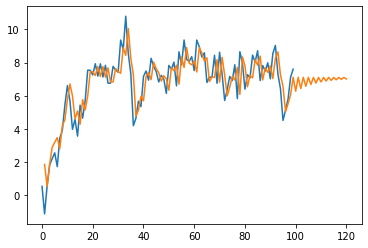

In [ ]:
plt.plot(Yt)
plt.plot(predictions)
plt.show()

###2: AutoReg (Stats Models)

####2.1: Data preparation

> We do not need to shift the original time series. The function does it for us

In [ ]:
df = pnd.DataFrame()
df["Yt"]=y
df.head()

,Yt
0,0.531714
1,-1.130047
2,0.552609
3,1.826022
4,2.201513


In [ ]:
#Train / Test
percTrain = 0.90
index = math.floor(len(df)*percTrain)
y_train = df["Yt"].iloc[0:index].values
y_test = df["Yt"].iloc[index:len(df)].values

In [ ]:
AR = AutoReg(y_train, lags = 1, old_names=False).fit()

Th old_names parameter is used to corrected this warning : *The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names*

In [ ]:
AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                   90
Model:                     AutoReg(1)   Log Likelihood                -135.341
Method:               Conditional MLE   S.D. of innovations              1.107
Date:                Wed, 30 Nov 2022   AIC                              0.271
Time:                        13:06:30   BIC                              0.355
Sample:                             1   HQIC                             0.305
                                   90                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4309      0.387      3.697      0.000       0.672       2.190
y.L1           0.7984      0.055     14.462      0.000       0.690       0.907
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2525           +0.0000j            1.2525            0.0000
-----------------------------------------------------------------------------
"""

####2.2: Model evaluation

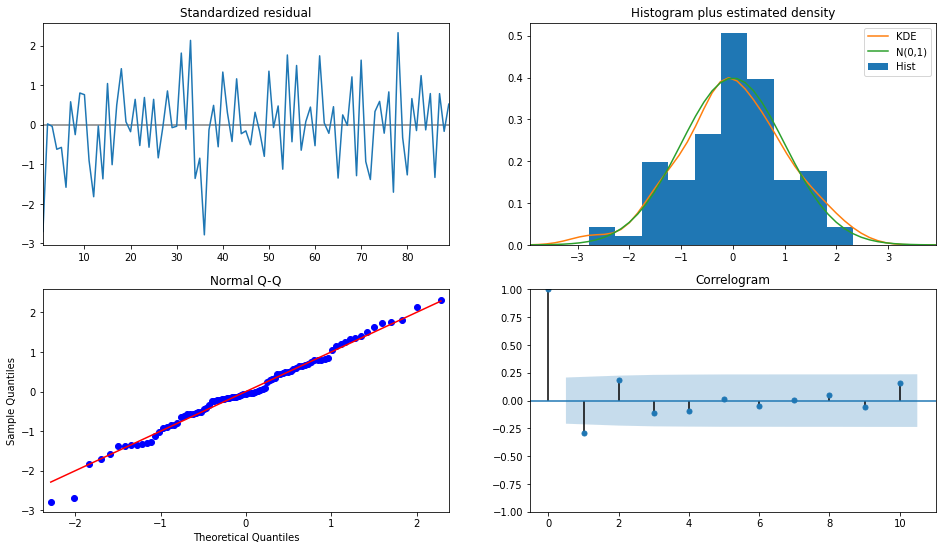

In [ ]:
fig = plt.figure(figsize=(16, 9))
AR.plot_diagnostics(fig=fig)
plt.show()

####2.3: Make futur

In [ ]:
Yt = y
predictions = []
predictions.append(np.NaN)

c = 2.9983
beta_1 = 0.5597
nbDatas = 20

#Step 1: Predict on Yt
for t in range(1,len(Yt)):
  y_t_1 = Yt[t-significantLag]
  predictions.append(c + y_t_1*beta_1)

#Step 2: Forecast futur based on latested predictions 
for t in range(len(predictions)-1,len(predictions)+nbDatas):
  y_t_1 = predictions[t-significantLag]
  predictions.append(c + y_t_1*beta_1)

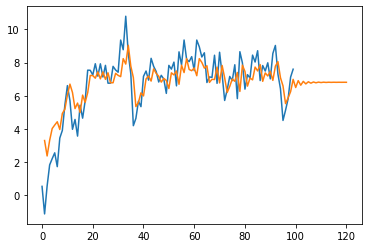

In [ ]:
plt.plot(y)
plt.plot(predictions)
plt.show()

###3: PMDArima (Library based on Stats model)

In [ ]:
!pip install statsmodels 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 4.7 MB/s 
     |████████████████████████████████| 9.9 MB 39.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pmdarima as pm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
y = [ 0.53171375, -1.13004684,  1.79906943,  5.28364035,  4.70368022,  6.41399362,
  7.23316384,  7.86039149,  6.4177638,   6.87120017,  8.34900317,  8.5213409,
  7.5862709,   5.94740528,  4.36290473,  5.22980318,  5.76484894,  6.50820903,
  5.6178172,   7.19961042,  7.21770871,  6.32855245,  5.65257571,  6.70215031,
  6.36544104,  7.15820186,  6.31186086,  6.51551651,  6.46468354,  6.55810009,
  6.42732869,  6.18624249,  6.76566375,  7.40482989,  9.00639677,  8.28786648,
  7.40592888,  6.65316765,  4.57680106,  6.02095438,  5.65845565,  6.64868243,
  6.96780693,  8.04842723,  7.89512635,  8.08302121,  6.40298035,  6.12838728,
  6.37525084,  7.85088718,  8.37155213,  7.43692165,  7.261006,  5.70100846,
  4.93344287,  5.93898008,  6.49964012,  5.05475137,  7.07325126,  6.00013402,
  8.39459373,  8.44255308,  6.79384811,  6.41294045,  5.03272732,  6.30485573,
  6.85840508,  8.07423934,  7.2503207,   7.93862196,  9.9423554,  10.2006523,
  8.81992323,  6.87449427,  7.72184,     7.02950636,  6.42642659,  5.3100392,
  4.5303716,   5.71741515,  5.79667926,  6.69253657,  6.08910187,  7.08488078,
  6.37976055,  6.50373773,  6.63543971,  5.23812489,  7.35495452,  7.03443667,
  6.62948259,  8.77340981,  7.43658585,  7.1843629,  8.61524929,  8.94050175,
  7.68484821,  8.60103042,  6.24779747,  7.11666841]

y = np.array(y)

> The ARIMA model will be discussed in the following notebooks.
Note that the first parameter of the model corresponds to the order of the AR

In [ ]:
significantLag = 1 #Found with PACF

In [ ]:
AR = pm.ARIMA(order=(significantLag, 0,0))
AR.fit(y)

ARIMA(order=(1, 0, 0))

In [ ]:
AR.arparams()

array([0.76645306])

In [ ]:
AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -153.266
Date:                Thu, 01 Dec 2022   AIC                            312.533
Time:                        07:47:42   BIC                            320.348
Sample:                             0   HQIC                           315.696
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5136      0.286      5.300      0.000       0.954       2.073
ar.L1          0.7665      0.050     15.477      0.000       0.669       0.864
sigma2         1.2443      0.194      6.426      0.000       0.865       1.624
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 5.15
Prob(Q):                              0.87   Prob(JB):                         0.08
Heteroskedasticity (H):               0.75   Skew:                            -0.42
Prob(H) (two-sided):                  0.40   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Sigma2 ($\sigma^2$) is 'The variance of the residuals.'  

In [ ]:
Yt = y
predictions = []
predictions.append(np.NaN)

c = 1.5136
beta_1 = 0.7665
nbDatas = 20

#Step 1: Predict on Yt
for t in range(1,len(Yt)):
  y_t_1 = Yt[t-significantLag]
  predictions.append(c + y_t_1*beta_1)

#Step 2: Forecast futur based on latested predictions 
for t in range(len(predictions)-1,len(predictions)+nbDatas):
  y_t_1 = predictions[t-significantLag]
  predictions.append(c + y_t_1*beta_1)

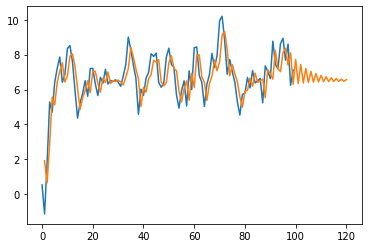

In [ ]:
plt.plot(y)
plt.plot(predictions)
plt.show()

### 4: Observations

- The autoregression model is based on the previous Yt values.

- We notice that the forecasts become more and more imprecise.

This is due to the fact that if we choose a prediction period that is too long we make predictions on predicted values.

- **The best is to make a new learning at each new real yt value (each hours, days, month it depends on the update frequency) and choose a small prediction window**

##**2: BACKSHIFT NOTATION**





###2.1: The backshift operator

$$\text{Backshift operator}  = B$$

$$B_{y_t} = y_{t-1}$$

>  B has the effect of shifting the data back **one period**

$$\textbf{B}=y_{t-1}$$

$$B(By_t) = B^2y_t = y_{t-2}$$

$$\textbf{B}^{10}=y_{t-10}$$

### 2.2: Backshift notation and differencing

The differentiation is used to make a series stationary

One order differencing

$$y_t' = y_t - y_{t-1}$$
$$y_t' = y_t - \textbf{B}$$
$$y_t' = (1 - \textbf{B})y_t$$

Second order differencing

$$y_t'' = y_t - y_{t-1} - y_{t-2} $$
$$y_t' = y_t - \textbf{B}^2$$
$$y_t' = (1 - \textbf{B})^2y_t$$

dth-order differencing

$$(1-\textbf{B})^dyt$$